This is prediction model for predicting the type of crop to be grown for a given climatic condition

Importing Libraries

In [137]:
#for manipulations
import numpy as np
import pandas as pd

#for data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact 


from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report

In [138]:
data=pd.read_csv('agr.csv')

This is the dataset

In [139]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [140]:
print("Shape of data is :",data.shape)

Shape of data is : (2200, 8)


In [141]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [142]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [143]:
data['label'].value_counts()

papaya         100
coffee         100
blackgram      100
mungbean       100
orange         100
watermelon     100
mango          100
mothbeans      100
coconut        100
muskmelon      100
maize          100
pomegranate    100
grapes         100
kidneybeans    100
apple          100
chickpea       100
rice           100
cotton         100
jute           100
lentil         100
banana         100
pigeonpeas     100
Name: label, dtype: int64

In [144]:
print("Average ratio of Nitrogen in soil : {0:.2f}".format(data['N'].mean()))
print("Average ratio of Phosphorous in soil : {0:.2f}".format(data['P'].mean()))
print("Average ratio of Potassium in soil : {0:.2f}".format(data['K'].mean()))
print("Average Temprature in Celcius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average ratio of Nitrogen in soil : 50.55
Average ratio of Phosphorous in soil : 53.36
Average ratio of Potassium in soil : 48.15
Average Temprature in Celcius : 25.62
Average Relative Humidity in % : 71.48
Average PH value of the soil : 6.47
Average Rainfall in mm : 103.46


In [145]:
#Lets check summary statistics for each crop
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("-------------------------------------------------")
    print(" Statistics for Nitrogen ")
    print("Minimum Nitrogen required",x['N'].min())
    print("Average Nitrogen required",x['N'].mean())
    print("Maximum Nitrogen required",x['N'].max())  
    print("-------------------------------------------------")
    print(" Statistics for Phosphorous ")
    print("Minimum Phosphorous required",x['P'].min())
    print("Average Phosphorous required",x['P'].mean())
    print("Maximum Phosphorous required",x['P'].max())  
    print("-------------------------------------------------")
    print(" Statistics for Potassium ")
    print("Minimum Potassium required",x['K'].min())
    print("Average Potassium required",x['K'].mean())
    print("Maximum Potassium required",x['K'].max())  
    print("-------------------------------------------------")
    print(" Statistics for Temperature ")
    print("Minimum Temperature required :{0:.2f} ".format(x['temperature'].min()))
    print("Average Temperature required :{0:.2f} ".format(x['temperature'].mean()))
    print("Maximum Temperature required :{0:.2f} ".format(x['temperature'].max()))   
    print("-------------------------------------------------")
    print(" Statistics for Humidity ")
    print("Minimum Humidity required :{0:.2f} ".format(x['humidity'].min()))
    print("Average Humidity required :{0:.2f} ".format(x['humidity'].mean()))
    print("Maximum Humidity required :{0:.2f} ".format(x['humidity'].max()))   
    print("-------------------------------------------------")
    print(" Statistics for PH ")
    print("Minimum PH required :{0:.2f} ".format(x['ph'].min()))
    print("Average PH required :{0:.2f} ".format(x['ph'].mean()))
    print("Maximum PH required :{0:.2f} ".format(x['ph'].max()))   
    print("-------------------------------------------------")
    print(" Statistics for Rainfall ")
    print("Minimum Rainfall required :{0:.2f} ".format(x['rainfall'].min()))
    print("Average Rainfall required :{0:.2f} ".format(x['rainfall'].mean()))
    print("Maximum Rainfall required :{0:.2f} ".format(x['rainfall'].max()))   

interactive(children=(Dropdown(description='crops', options=('papaya', 'coffee', 'blackgram', 'mungbean', 'ora…

In [146]:
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print("Average value for ",conditions," is : {0:.2f}".format(data[conditions].mean()) )
    print("-------------------------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label']=='rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[(data['label']=='blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label']=='banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label']=='jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label']=='coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label']=='Apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label']=='papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label']=='muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label']=='grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label']=='watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print("Mug Beans : {0:.2f}".format(data[(data['label']=='mugbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label']=='orange')][conditions].mean()))
    print("Chick peas : {0:.2f}".format(data[(data['label']=='chickpea')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label']=='lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label']=='cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label']=='maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[(data['label']=='mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label']=='mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label']=='pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label']=='coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [147]:
@interact
def compare(conditions=['N','P','K','temperature','humidity','ph','rainfall']):
    print("Crops which require greater than average ",conditions, '\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("-------------------------------------------------")
    print("Crops which require less than average ",conditions,"is '\n'")
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

Ploting the Distributions For Agricultural Conditions

C:\Users\vostro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


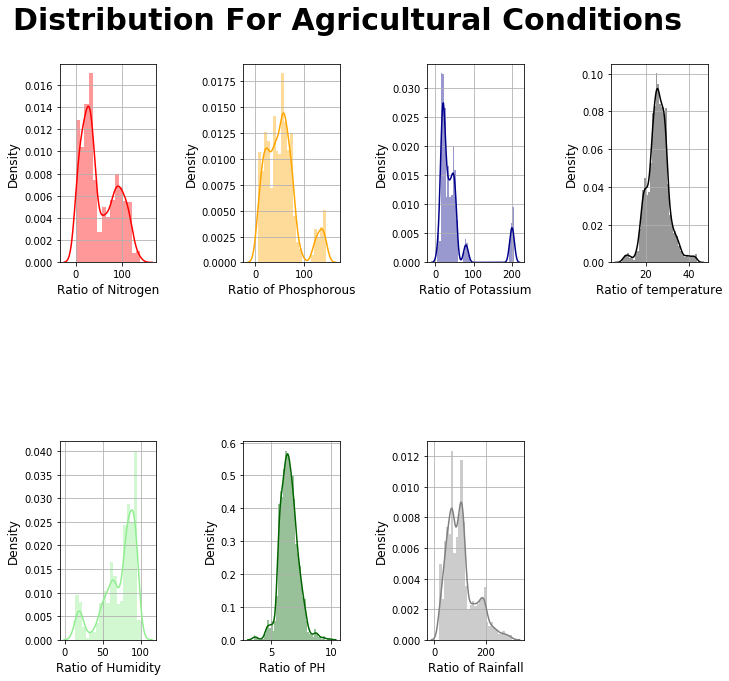

In [164]:
# fig4=plt.figure()
plt.subplot(2,4,1)
sns.distplot(data['N'],color='red')
plt.xlabel("Ratio of Nitrogen", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,2)
sns.distplot(data['P'],color='orange')
plt.xlabel("Ratio of Phosphorous", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,3)
sns.distplot(data['K'],color='darkblue')
plt.xlabel("Ratio of Potassium", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='black')
plt.xlabel("Ratio of temperature", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,5)
sns.distplot(data['humidity'],color='lightgreen')
plt.xlabel("Ratio of Humidity", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,6)
sns.distplot(data['ph'],color='darkgreen')
plt.xlabel("Ratio of PH", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='grey')
plt.xlabel("Ratio of Rainfall", fontsize=12)
plt.grid()
plt.ylabel("Density", fontsize=12)
plt.subplots_adjust(left = 0.1, bottom = 0.1, top=0.9,right = 1, hspace = 0.9, wspace = 0.9)


plt.suptitle("Distribution For Agricultural Conditions",fontsize=30,fontweight='bold')
plt.show()

Patterns Followed By DATASET

In [149]:
print("Sone interesting patterns")
print("---------------------------------------")
print("Crops which require very high ratio of Nitrogen in soil",data[data['N']>120]['label'].unique())
print("Crops which require very low ratio of Nitrogen in soil",data[data['N']<120]['label'].unique())
print("Crops which require very high ratio of Phosphorous in soil",data[data['P']>100]['label'].unique())
print("Crops which require very low ratio of Phosphorous in soil",data[data['P']<100]['label'].unique())
print("Crops which require very high ratio of Potassium in soil",data[data['K']>200]['label'].unique())
print("Crops which require very low ratio of Potassium in soil",data[data['K']<200]['label'].unique())
print("Crops which require very high Rainfall ",data[data['rainfall']>200]['label'].unique())
print("Crops which require very high Temperature",data[data['temperature']>40]['label'].unique())
print("Crops which require very high PH ",data[data['ph']>9]['label'].unique())
print("Crops which require very low PH ",data[data['ph']>4]['label'].unique())
print("Crops which require very low Humidity",data[data['N']<20]['label'].unique())

Sone interesting patterns
---------------------------------------
Crops which require very high ratio of Nitrogen in soil ['cotton']
Crops which require very low ratio of Nitrogen in soil ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which require very high ratio of Phosphorous in soil ['grapes' 'apple']
Crops which require very low ratio of Phosphorous in soil ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']
Crops which require very high ratio of Potassium in soil ['grapes' 'apple']
Crops which require very low ratio of Potassium in soil ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomeg

Showing the Crops according to their SEASONS

In [150]:
print("Summer Crops")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("---------------------------------------------------------")
print("Winter Crops")
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print("---------------------------------------------------------")
print("Rainfall Crops")
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------------------------
Rainfall Crops
['rice' 'papaya' 'coconut']


In [151]:
#removing the lables column
x=data.drop(['label'], axis=1)

#selecting all the values of data
x=x.values

#checking the shape
print(x.shape)

(2200, 7)


Using Elbow Method to find number of Clusters

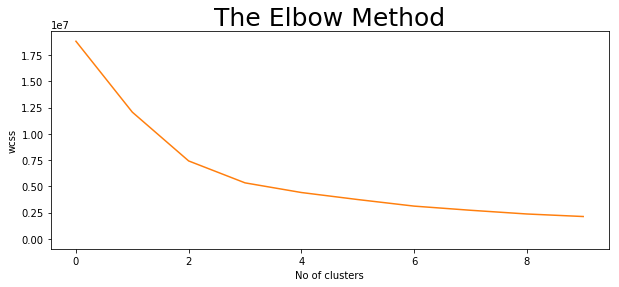

In [152]:
#Determination of optimum number of clusters
plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
#Ploting
plt.plot(1,11,wcss)
plt.title('The Elbow Method',fontsize=25)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

Using K Means Algorithm to for creating clusters

In [153]:
#implementation K Means Algorithom on Analysis
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)
#results
a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename (columns = {0:'cluster'})
#cluster of each crop
print("Lets check the result after appling K Means clustering analysis \n")
print("Crops in First cluster",z[z['cluster']==0]['label'].unique())
print("------------------------------------------")
print("Crops in Second cluster",z[z['cluster']==1]['label'].unique())
print("------------------------------------------")
print("Crops in Third cluster",z[z['cluster']==2]['label'].unique())
print("------------------------------------------")
print("Crops in Fourth cluster",z[z['cluster']==3]['label'].unique())

Lets check the result after appling K Means clustering analysis 

Crops in First cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
------------------------------------------
Crops in Second cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
------------------------------------------
Crops in Third cluster ['grapes' 'apple']
------------------------------------------
Crops in Fourth cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [154]:
y=data['label']
x=data.drop(['label'],axis=1)

print("Shape of Y",y.shape)
print("Shape of X",x.shape)

Shape of Y (2200,)
Shape of X (2200, 7)


Seperating Dataset for testing and training

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print("The shape of X-train is : ",x_train.shape)
print("The shape of X-test is : ",x_test.shape)
print("The shape of Y-train is : ",y_train.shape)
print("The shape of Y-test is : ",y_test.shape)

The shape of X-train is :  (1760, 7)
The shape of X-test is :  (440, 7)
The shape of Y-train is :  (1760,)
The shape of Y-test is :  (440,)


Using Logistic Regression for Prediction

In [156]:
#Creating a Predictive Model
model=LogisticRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_pred=model.predict(x_test)

C:\Users\vostro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vostro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Using Confusion Matrix and Classification Report for findng Accuraccy

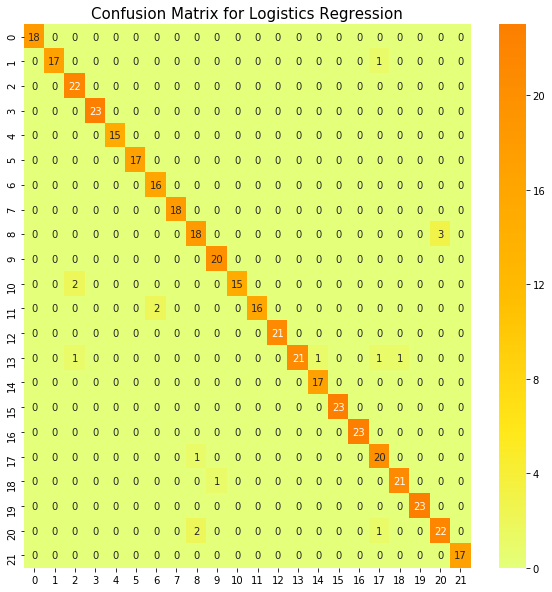

In [157]:
#evaluate model performance
#printing confusion matrix
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title("Confusion Matrix for Logistics Regression",fontsize=15)
plt.show()

In [158]:
#Printing classification report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [159]:
#Printing classification report
tcr = classification_report(y_train,y_train_pred)
print(tcr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        82
      banana       0.99      1.00      0.99        82
   blackgram       0.88      0.91      0.89        78
    chickpea       1.00      1.00      1.00        77
     coconut       1.00      0.99      0.99        85
      coffee       0.98      1.00      0.99        83
      cotton       0.88      1.00      0.94        84
      grapes       1.00      1.00      1.00        82
        jute       0.86      0.77      0.81        79
 kidneybeans       1.00      1.00      1.00        80
      lentil       0.94      0.90      0.92        83
       maize       1.00      0.84      0.91        82
       mango       1.00      1.00      1.00        79
   mothbeans       0.89      0.91      0.90        75
    mungbean       0.98      0.98      0.98        83
   muskmelon       1.00      1.00      1.00        77
      orange       1.00      1.00      1.00        77
      papaya       0.92    

In [160]:
data.head(520)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


Prediciting Crop According to the Conditions

In [161]:
prediction=model.predict((np.array([[15,
                                                          55,
                                                          23,
                                                          30,
                                                          42,
                                                          6,
                                                          30]])))
print("The suggested crop for given climatic condition is : ",prediction)

The suggested crop for given climatic condition is :  ['mothbeans']


In [162]:
data.head(1320)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [165]:
prediction=model.predict((np.array([[95,
                                                          12,
                                                          51,
                                                          26,
                                                          80,
                                                          7,
                                                          60]])))
print("The suggested crop for given climatic condition is : ",prediction)

The suggested crop for given climatic condition is :  ['watermelon']


                                 -----------------------------END OF CODE------------------------------